<a href="https://colab.research.google.com/github/Shubhamssd97/Shubhamssd97/blob/main/Bike_Sharing_Demand_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing Demand Prediction**    



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -** Shubham Shrikrushna Dahikar


# **GitHub Link -**

https://github.com/Shubhamssd97

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **Let's Begin**

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime as dt

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
seoulbike_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Bike Sharing Prediction/SeoulBikeData.csv', encoding = ('ISO-8859-1'),low_memory = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
seoulbike_data.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Bottom 10 Rows of the Dataset
seoulbike_data.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
seoulbike_data.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
seoulbike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
seoulbike_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
seoulbike_data.isnull().sum()
seoulbike_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


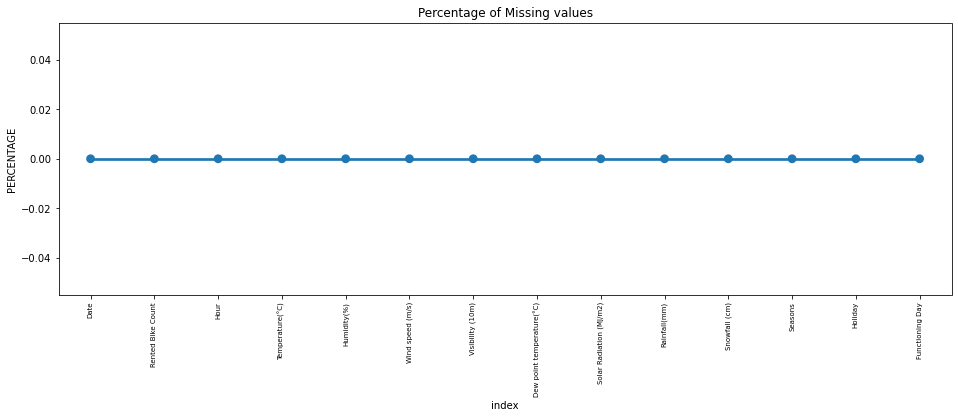

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((seoulbike_data.isnull().sum())*100/seoulbike_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")

plt.show()

### What did you know about your dataset?

The given dataset is of Rented Bike counts per hour throughout the year and we need to analyse the to prectict the required count of bikes per hour.
It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.

The above dataset has 14 columns and 8760 rows.
It has no dublicated value and no missing value.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
seoulbike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
seoulbike_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


### Variables Description 

#### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


* ### Date in YYYY-MM-DD
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour in Hour of he day
* ### Temperature in Celsius
* ### Humidity in %
* ### Wind Speed in m/s
* ### Visibility in 10m
* ### Dew point temperature in Celsius
* ### Solar radiation in MJ/m2
* ### Rainfall in mm
* ### Snowfall in cm
* ### Seasons 
* ### Holiday  
* ### Functional Day 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
seoulbike_data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Changing the "Date" column into three "year","month","day" column
seoulbike_data['Date'] = seoulbike_data['Date'].apply(lambda x:
                                                      dt.datetime.strptime(x,"%d/%m/%Y"))

seoulbike_data['year'] = seoulbike_data['Date'].dt.year
seoulbike_data['month'] = seoulbike_data['Date'].dt.month
seoulbike_data['day'] = seoulbike_data['Date'].dt.day_name()



In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
seoulbike_data['weekdays_weekend']=seoulbike_data['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
seoulbike_data=seoulbike_data.drop(columns=['Date','day','year'],axis=1)

In [ ]:
# Let's see New Columns
print(seoulbike_data.head())


   Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0  

In [ ]:
print(seoulbike_data['weekdays_weekend'].value_counts())

0    6264
1    2496
Name: weekdays_weekend, dtype: int64


In [ ]:
#Change the int64 column into catagory column (i.e Changing datatype)
cols=['Hour','month','weekdays_weekend']
for col in cols:
  seoulbike_data[col]=seoulbike_data[col].astype('category')

seoulbike_data.dtypes

Rented Bike Count               int64
Hour                         category
Temperature(°C)               float64
Humidity(%)                     int64
Wind speed (m/s)              float64
Visibility (10m)                int64
Dew point temperature(°C)     float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Seasons                        object
Holiday                        object
Functioning Day                object
month                        category
weekdays_weekend             category
dtype: object

In [ ]:
#Rename the complex columns name
seoulbike_data=seoulbike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
seoulbike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

### What all manipulations have you done and insights you found?

* Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.
* As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe, so we need to change this data type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###  Categorical Variable Analysis

* **Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type**

#### Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

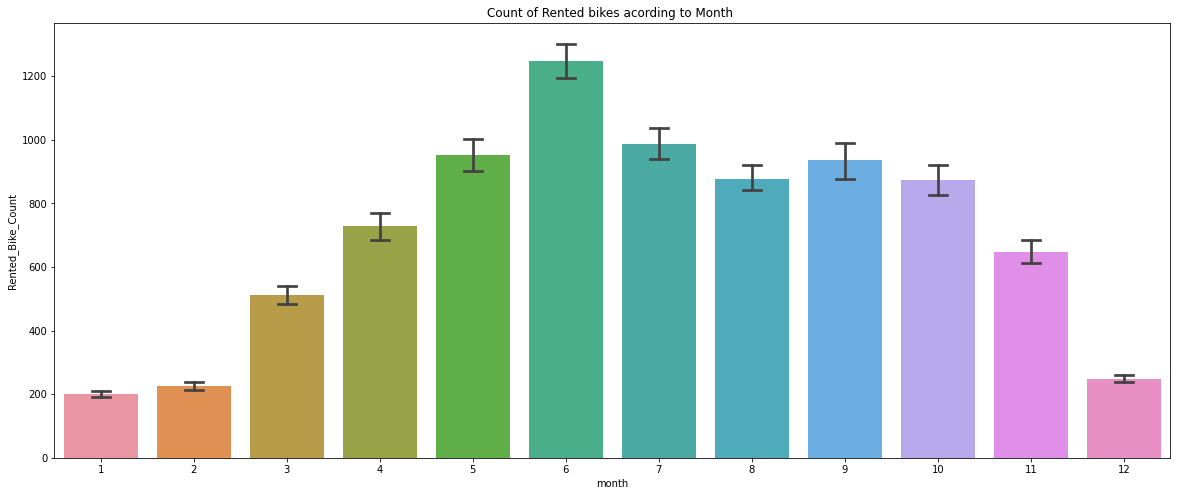

In [ ]:
# Month Column visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=seoulbike_data,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

##### 1. Why did you pick the specific chart?

**We need to know which months has the high demand of the rented bikes.**

##### 2. What is/are the insight(s) found from the chart?

**From the above bar plot we can clearly say that from  the month 5 to 10 the demand of the rented bike is high as compare to other months.these months are comes inside the summer season.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**From this plotting we understand that people love to ride in the summer season, usually most of people have vacation in summer and that might be reason for rented bike demand in summer season.**

#### Weekdays-Weekends

[Text(0.5, 1.0, 'Count of Rented bikes acording to Weekdays_Weekend ')]

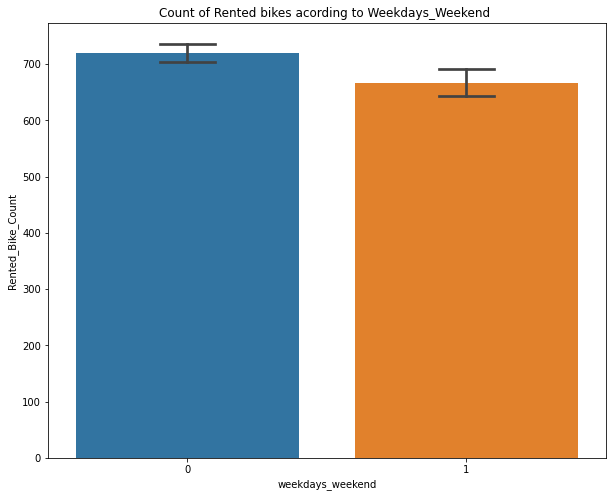

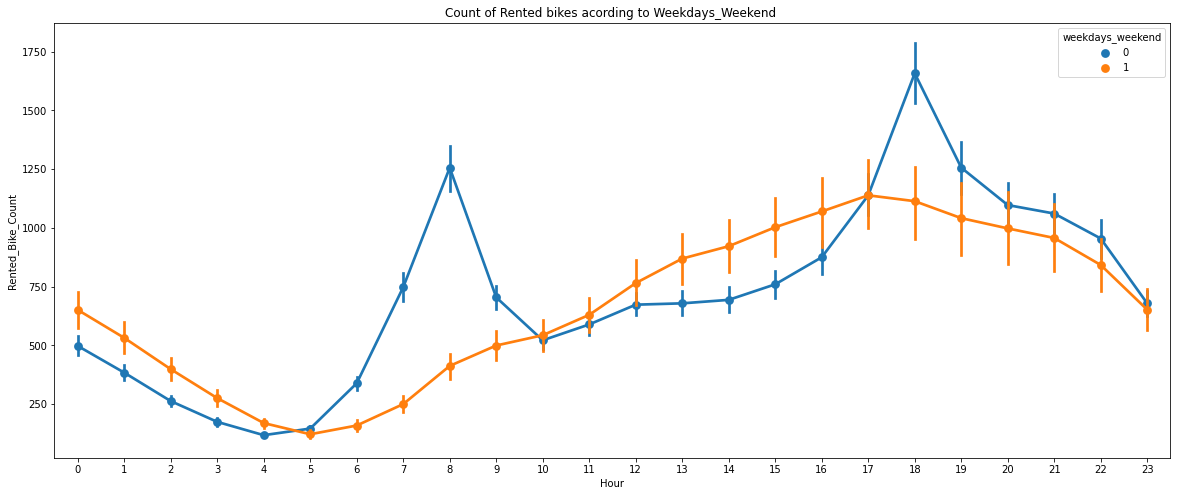

In [ ]:
# weekdays-weekends visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=seoulbike_data,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Weekdays_Weekend ')

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=seoulbike_data,x='Hour',y='Rented_Bike_Count',hue = 'weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to Weekdays_Weekend ')


##### 1. Why did you pick the specific chart?

**We need to know the demand of rented bikes on weekends as compared to weekdays.**

##### 2. What is/are the insight(s) found from the chart?

* **From the above point plot and bar plot Blue color represents the Weekdays and Orange color reprensents the Weekends.**
* **The orange colur which represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.**
* **Blue color which reprents the weekdays shows that there is hight demand of bikes during office timimng i.e. during 7 am to 9 am and 5 pm to 7 pm**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **From the above plot we came to know that there is a high demand during office time in weekdays, as this time can give a company more as company can hire more bikes than normal bikes count and this will help company to make more profit.**

#### Hour 

[Text(0.5, 1.0, 'Count of Rented bikes acording to  ')]

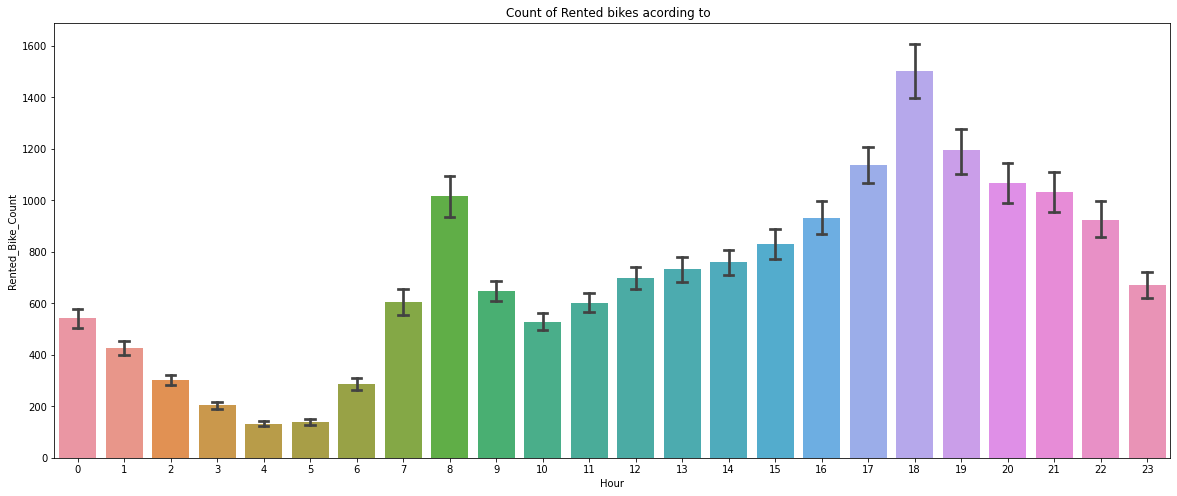

In [ ]:
# Hour Column visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=seoulbike_data,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to  ')

##### 1. Why did you pick the specific chart?

**We need to know about peak hours of demand of rented bike count throughout the year.**

##### 2. What is/are the insight(s) found from the chart?

* **In the above plot which shows the use of rented bike according the hours and the data are from all over the year.**

* **Generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**From above plot we can say that there is a high demand of bikes during day time and thats the positive point as company need not to charge any extra money from its customers.**

#### Functioning Day

Yes    8465
No      295
Name: Functioning_Day, dtype: int64


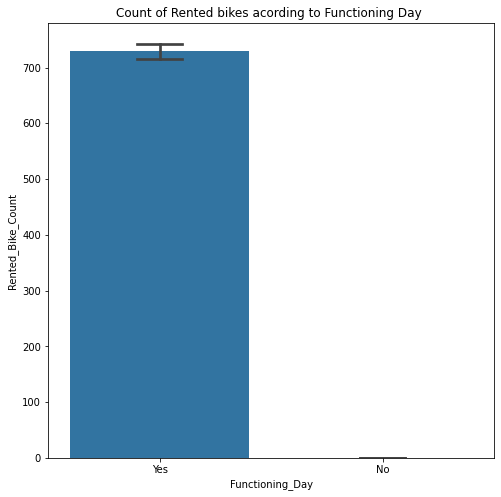

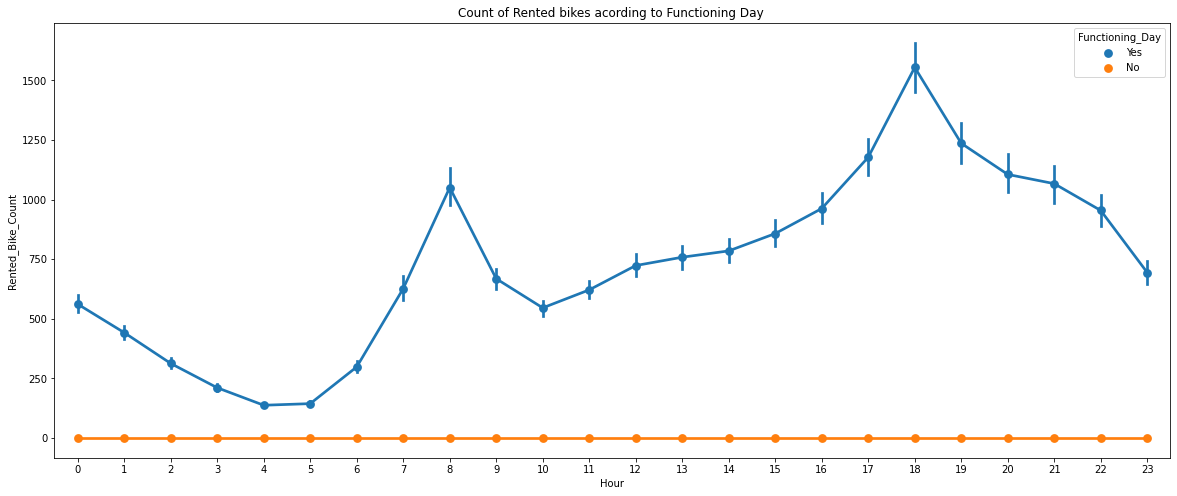

In [ ]:
# Functioning Days visualization code
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(data=seoulbike_data,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=seoulbike_data,x='Hour',y='Rented_Bike_Count',hue = 'Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

seoulbike_data["Functioning_Day"].unique()
print(seoulbike_data.Functioning_Day.value_counts())

##### 1. Why did you pick the specific chart?

**From above we are finding out weather the people are using rented bikes on functioning days or not.**

##### 2. What is/are the insight(s) found from the chart?

* **In the above bar plot and point plot which shows the use of rented bike in functioning days or not, and it clearly shows that,**
* **Peoples dont use reneted bikes in no functioning day.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **mostly people use the rented bikes on functioning days.**
* **There are very few people who use rented bikes on 'No Functioning days' to overcome this the company can give offer to customers on 'No Functioning days'.** 

#### Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

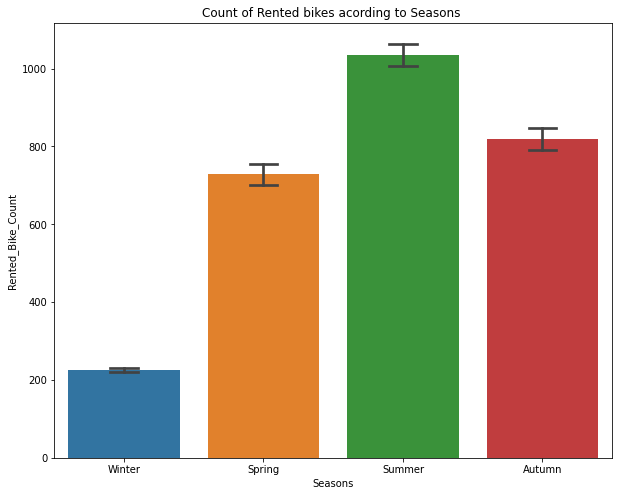

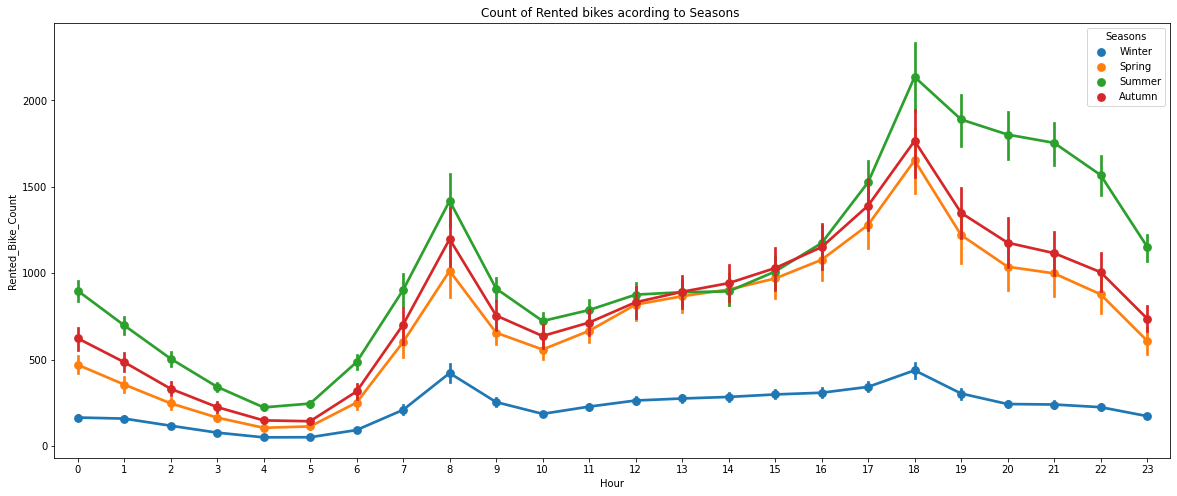

In [ ]:
# Seasons Column visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=seoulbike_data,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=seoulbike_data,x='Hour',y='Rented_Bike_Count',hue = 'Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

##### 1. Why did you pick the specific chart?

**As there are four category in seasons column we need to compare them and view how seasons affect the count of Bikes.**

##### 2. What is/are the insight(s) found from the chart?

* **In the above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,**
* **In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.**
* **In winter season the use of rented bike is very low because of snowfall.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**From above plot we see that the people love to stay at home during cold time.**

#### Holidays

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

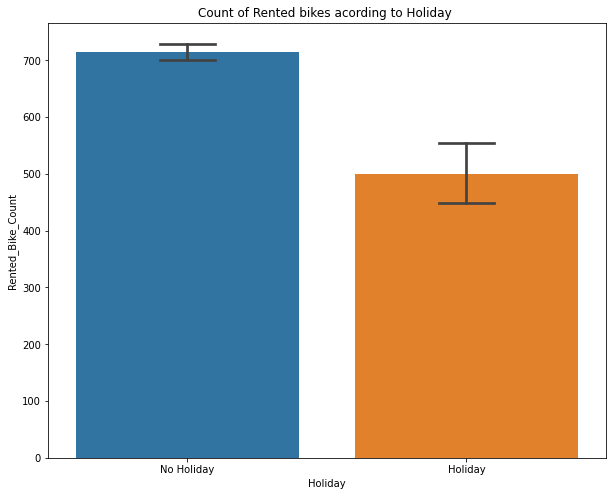

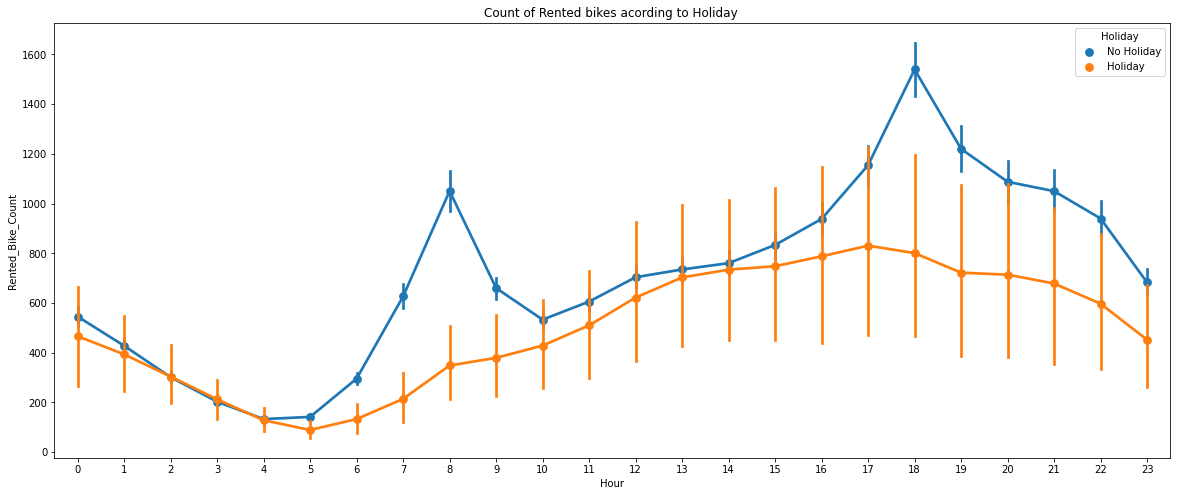

In [ ]:
# Holidays column visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=seoulbike_data,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=seoulbike_data,x='Hour',y='Rented_Bike_Count',hue = 'Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

##### 1. Why did you pick the specific chart?

**We need to know the count of Rented Bike on Holidays and No Holidays.**

##### 2. What is/are the insight(s) found from the chart?

* **In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,**
* **plot shows that in holiday people uses the rented bike from 2pm-8pm**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **From above plotting we understand that there is a more demand of bikes on 'No Holiday' Days than Holidays**
* **So company can also give Holiday to some of it's employees as there is a less demand of bikes on holidays.**

### **Analyse Numerical Data**

**Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

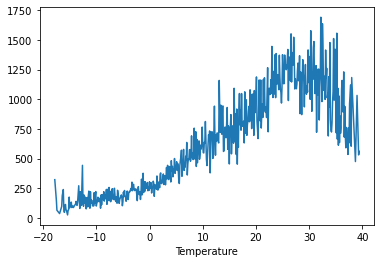

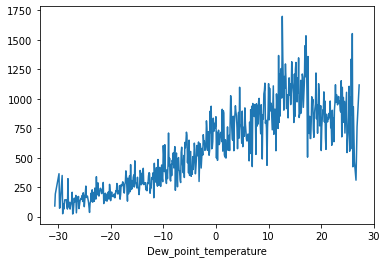

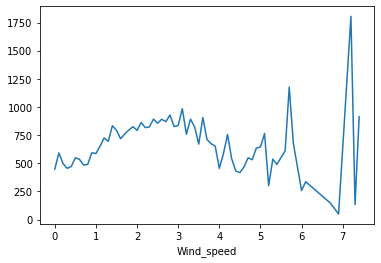

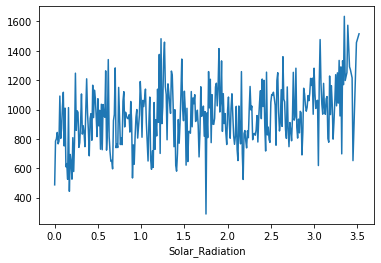

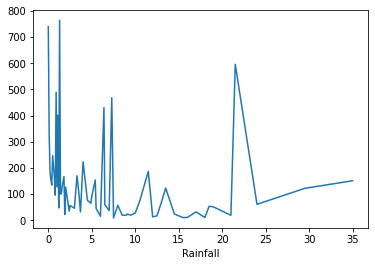

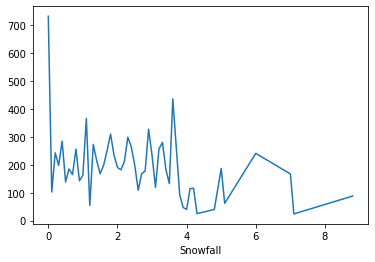

In [ ]:
# visualization code

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
seoulbike_data.groupby('Temperature').mean()['Rented_Bike_Count'].plot()
plt.show()

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew point Temperature" 
seoulbike_data.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()
plt.show()

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind Speed" 
seoulbike_data.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()
plt.show()

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar Radiation" 
seoulbike_data.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()
plt.show()

#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
seoulbike_data.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()
plt.show()
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
seoulbike_data.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()
plt.show()

##### 1. Why did you pick the specific chart?

**We  need to see what is the demand of rented bikes in different weather conditions i.e how it changes according to temperature, wind speed, rainfall etc conditions.**

##### 2. What is/are the insight(s) found from the chart?

* From "Temperature" plot we can see that people love to ride when its hot i.e around 25°C to 35°C.

* From "Dew Point Temperature" we see that people love to ride when its dry.

*  From "Wind Speed" plot we see that there is a demand for bike in windy condition.

*  From the "Solar Radiation" plot we see that, the amount of rented bikes is huge when there is solar radiation.

* From "Rainfall" plot we can see that there is no decrease in demand of rented bikes even if there is rainfall.

* From the "Snowfall" plot we can see that there is a decrease in demand of bikes as the snowfall increases above 4 cm.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Regression Plot

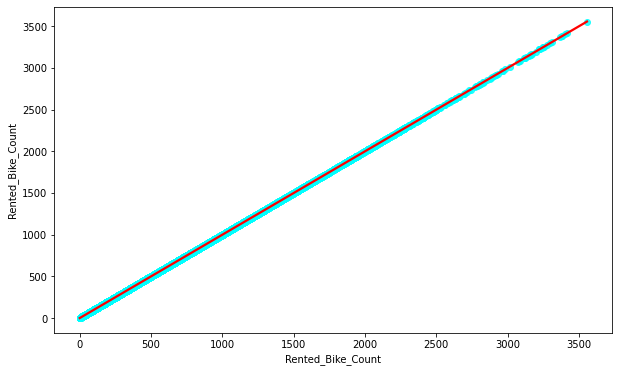

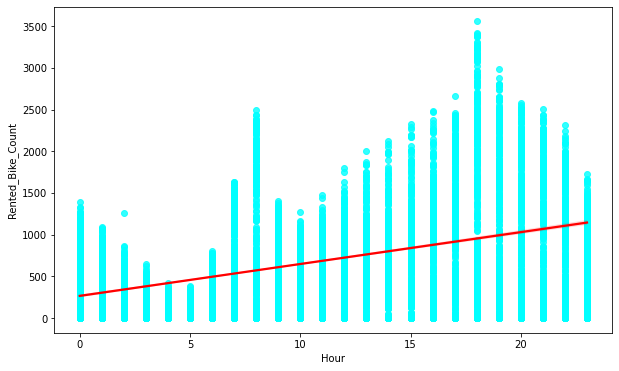

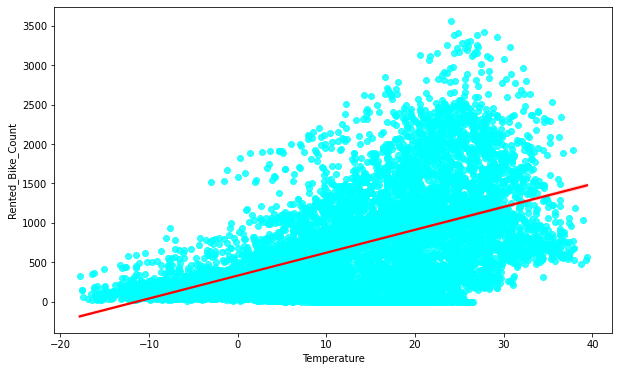

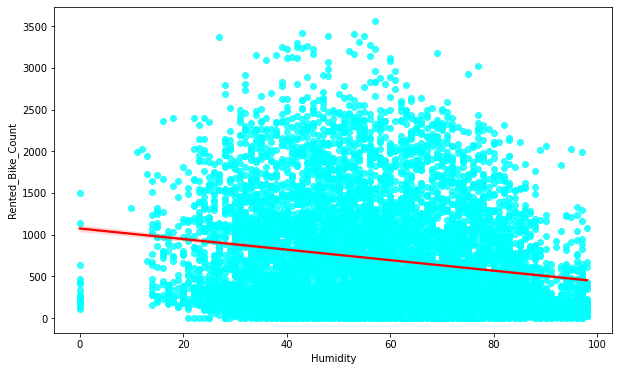

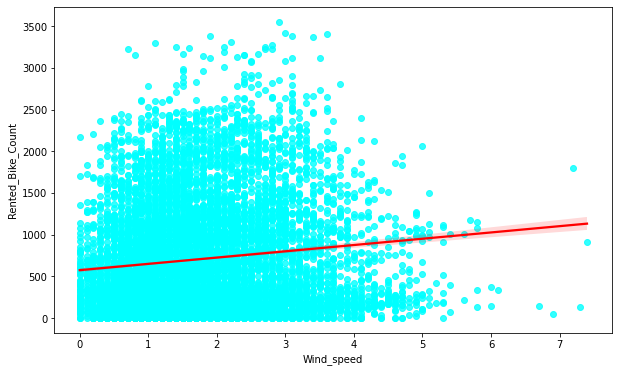

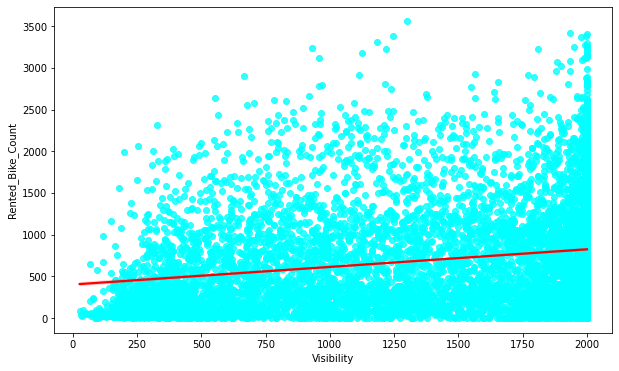

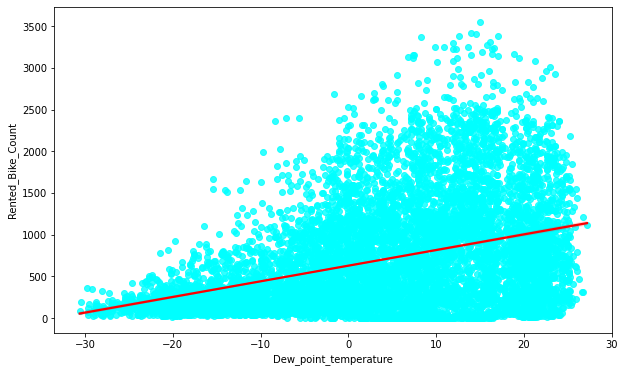

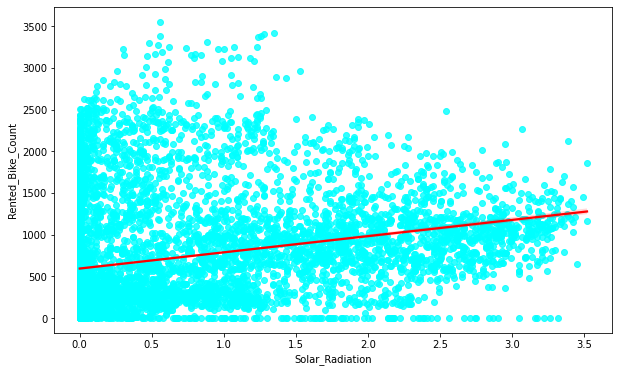

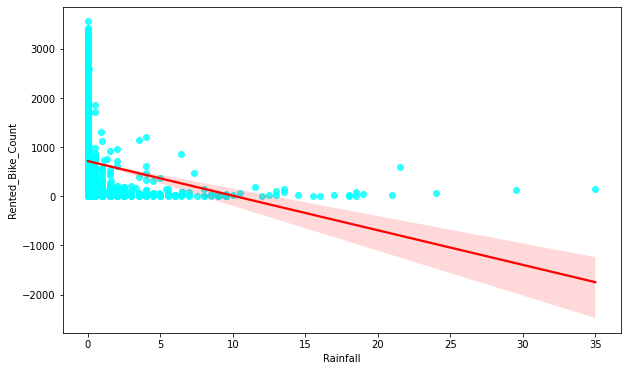

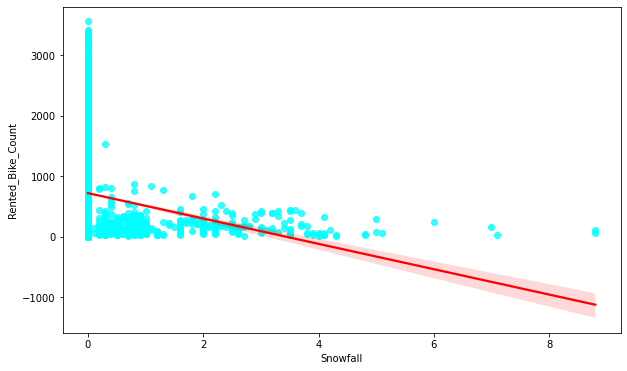

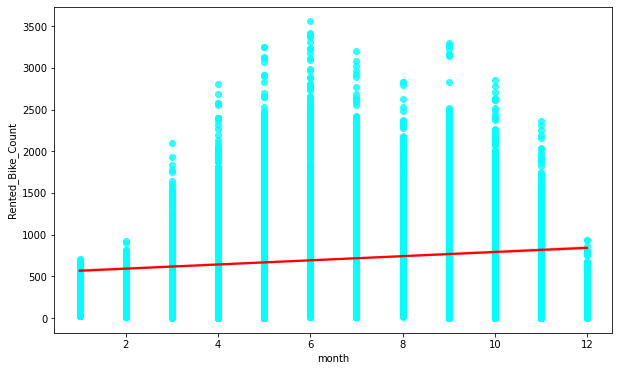

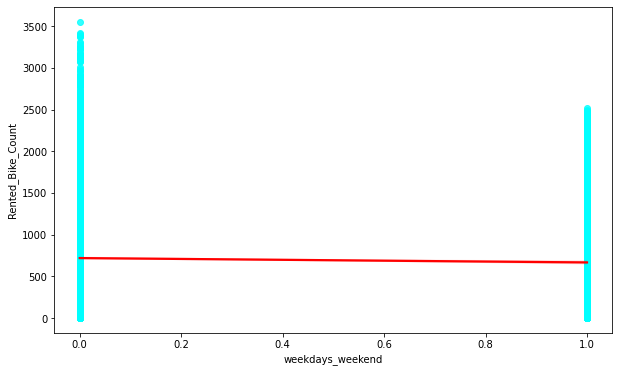

In [ ]:
# visualization code
#assign the numerical coulmn to variavle
numerical_columns=list(seoulbike_data.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=seoulbike_data[col],y=seoulbike_data['Rented_Bike_Count'],scatter_kws={"color": 'aqua'}, line_kws={"color": "red"})

##### 1. Why did you pick the specific chart?

* **The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

##### 2. What is/are the insight(s) found from the chart?

 From above plot we have following observations :

* When increase in "Temperature", "Wind Speed", "Visibility" and "Dew Point Temperature" there is a increase in demand. 

* And increase in "Humidity", "Rainfall", "Snowfall" there is a decrease in demand.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* **From above analysis we can say that "Temperature", "Wind Speed", "Visibility" and "Dew Point Temperature" are responcible for increase in count of Rented Bikes.**

### **Column wise Histogram And Box Plot Univariate Analysis**

In [ ]:
# Chart - 9 visualization code



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* **Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

* **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

###  Correlation Heatmap

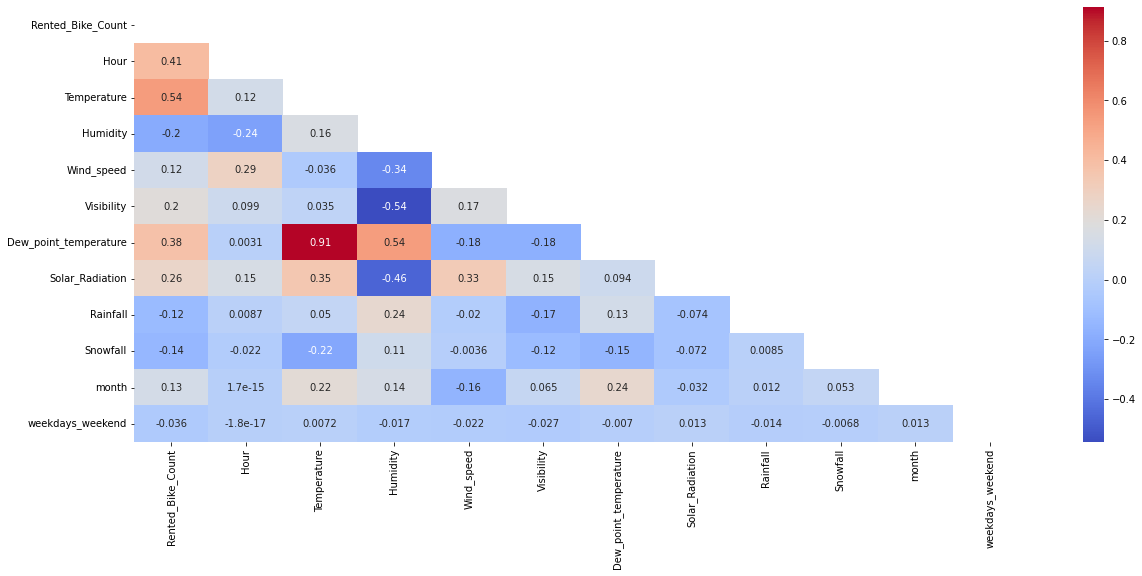

In [ ]:
# Correlation Heatmap visualization code

## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=seoulbike_data.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

##### 2. What is/are the insight(s) found from the chart?

**We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :**

* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are:**
* Humidity
* Rainfall

###  Pair Plot 

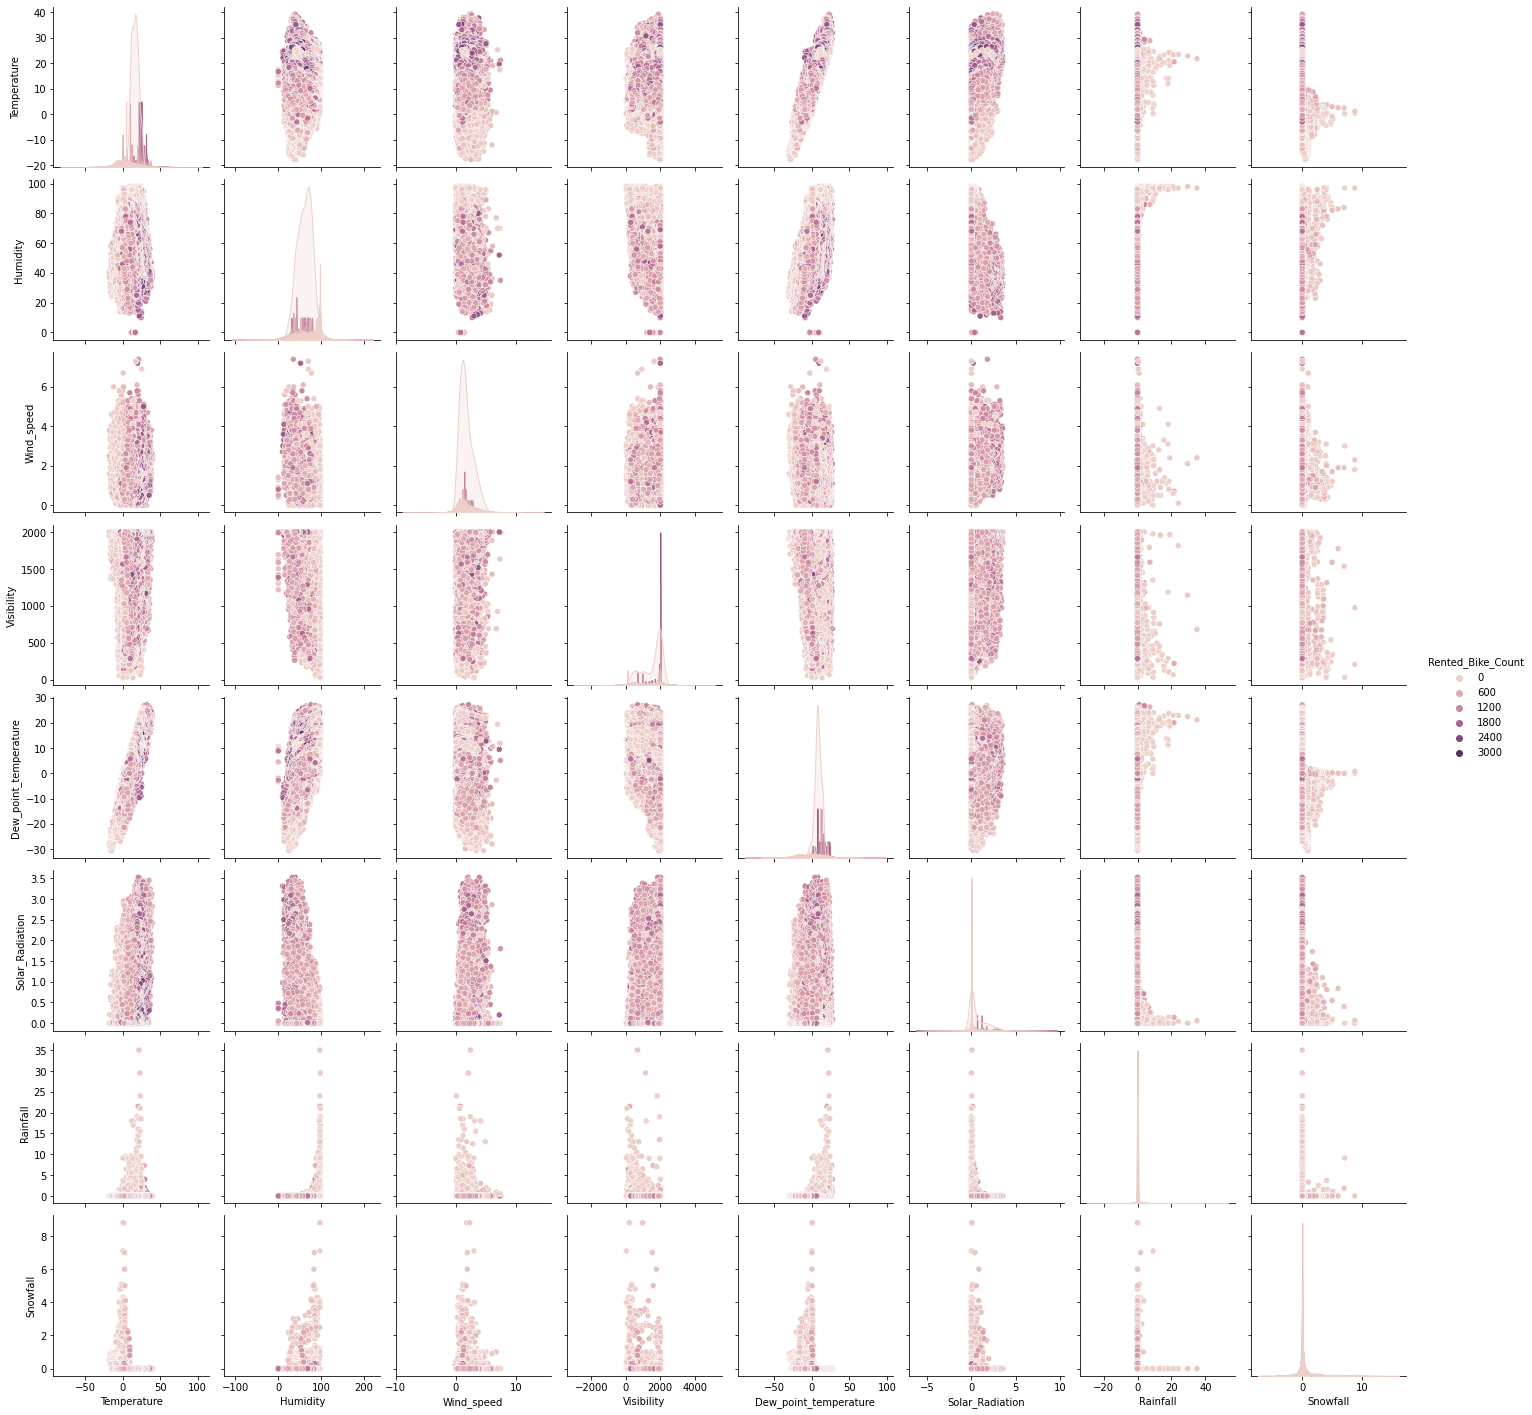

In [ ]:
# Pair Plot visualization code
sns.pairplot(seoulbike_data, hue="Rented_Bike_Count")

##### 1. Why did you pick the specific chart?

* **Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.** 
* **Pairplot allows us to plot pairwise relationships between variables within a dataset.** 

##### 2. What is/are the insight(s) found from the chart?

**Above Pairplot Shows us that :**
* **Increase in demand of rented bikes at normal hot temperature, when there is a visibility is high and when weather is dry.**
* **Decrease in rented bike count when there is Rainfall and Snowfalling outside.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
#Assign all catagoriacla features to a variable
categorical_features=list(seoulbike_data.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:
# Creating a Copy of dataset
df = seoulbike_data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df = one_hot_encoding(df, col)
df.head() 

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,0,0,1,1,1


### 1. Handling Missing Values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
month                    0
weekdays_weekend         0
Seasons_Spring           0
Seasons_Summer           0
Seasons_Winter           0
Holiday_No Holiday       0
Functioning_Day_Yes      0
dtype: int64


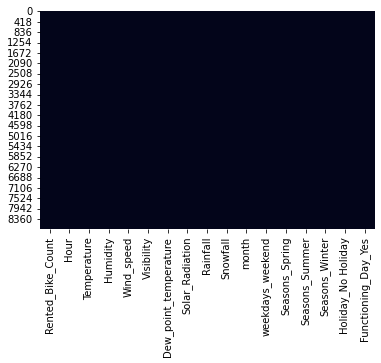

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

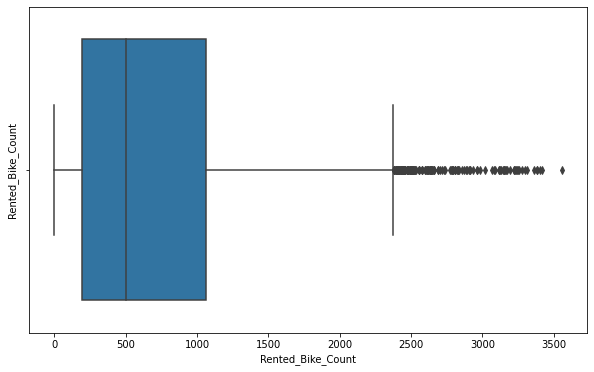

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


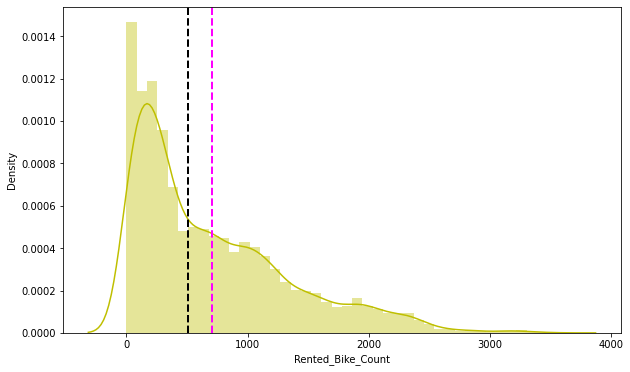

In [ ]:
# Handling Outliers & Outlier treatments
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()


#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(seoulbike_data['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(seoulbike_data['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(seoulbike_data['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

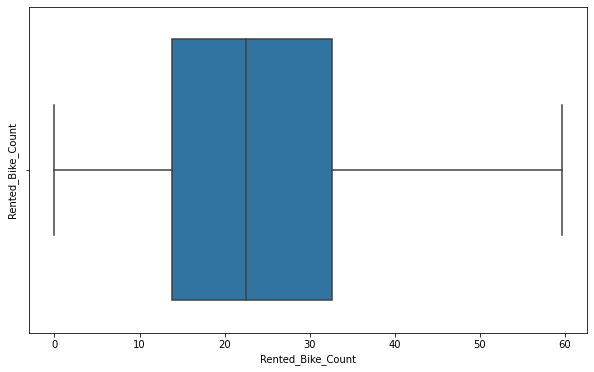

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


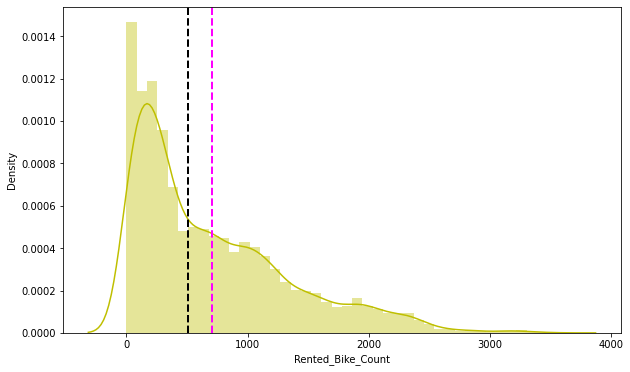

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()


#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(seoulbike_data['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(seoulbike_data['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(seoulbike_data['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

* ***The First boxplot shows that we have detect outliers in Rented Bike Count column***

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***


* **From Distribution plot we will look for skeweness of Rented Bike Count with respect to density.**

* **Plotting Boxplot of Rented Bike Count To check for outliers.**

* **The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**

* **The above boxplot shows that we have detect outliers in Rented Bike Count column**

* **From Distribution plot we are going to make it normal by applying square root to it.**

* **From boxplot we are checking that is there any outliers present or not.**

* **Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**

* **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**



### 3. Categorical Encoding

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Assign the value in X and Y
X = df.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df['Rented_Bike_Count'])

# Printing Top Columns
print(y.head())
X.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64


,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0,0,0,1,1,1


In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 16)
(2190, 16)


##### What data splitting ratio have you used and why? 

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

* **In our case we spit the data into 75:25 ratio.**



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### Linear Regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)
#check the score
reg.score(X_train, y_train)
# Predict on the model

0.6552975724025564

In [ ]:
#check the coefficeint
reg.coef_

array([ 4.91862812e-01,  7.15726462e-02, -2.74811432e-01,  1.05344923e-01,
        6.29815610e-05,  4.41650545e-01, -6.74618592e-01, -1.42448920e+00,
        1.17833245e-01,  1.59336971e-01, -1.42269511e+00, -1.83487376e+00,
       -2.67562684e+00, -7.09395166e+00,  3.12260510e+00,  2.86264115e+01])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.080960809327934
RMSE : 7.28566817864552
MAE : 5.586424669493191
R2 : 0.6552975724025564
Adjusted R2 : 0.6527594965435785


**Looks like our r2 score value is 0.65 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**





In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.08548027836937
RMSE : 5.75199793796637
MAE : 4.373223624494954
R2 : 0.7905536900393838
Adjusted R2 : 0.7858580231182677


**The r2_score for the test set is 0.79. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

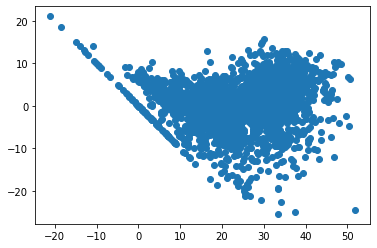

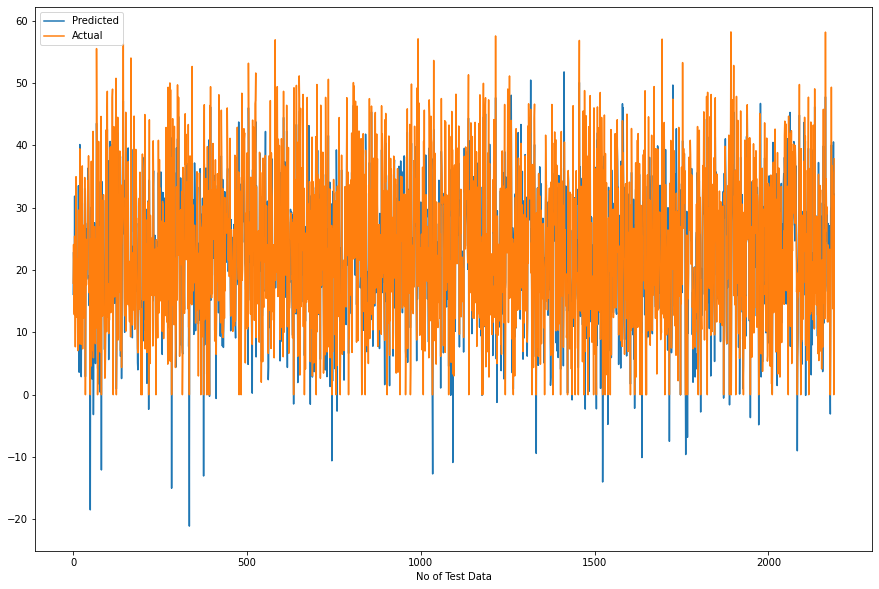

In [ ]:
# Visualizing evaluation Metric Score chart
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))


#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.45281538394695453 0.47701176077074947


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 80.53531396270661
RMSE : 8.974146976883464
MAE : 6.659731166521835
R2 : 0.47701176077074947
Adjusted R2 : 0.4731609499894941


**Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 86.43678576363727
RMSE : 9.297138579349953
MAE : 6.8652938771568115
R2 : 0.45281538394695453
Adjusted R2 : 0.44878641300500854


**The r2_score for the test set is 0.45. This means our linear model is  not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

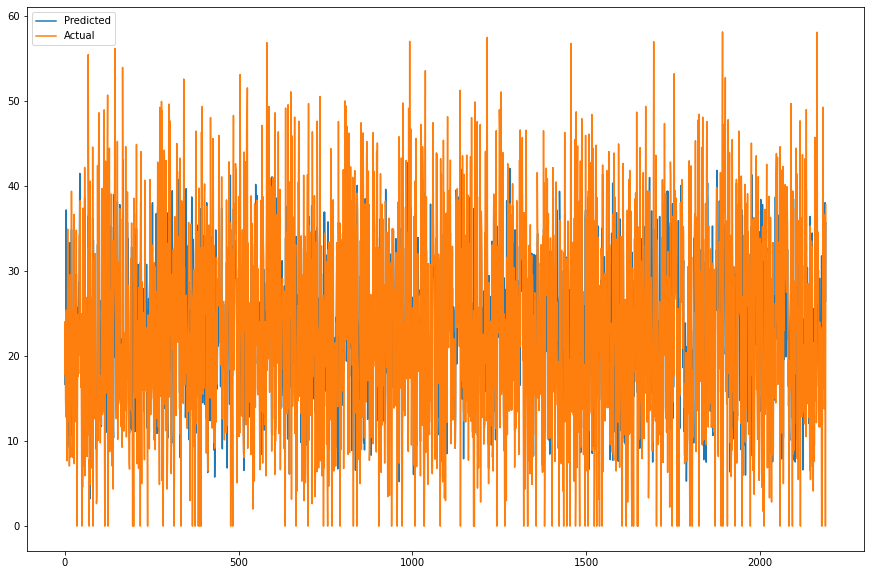

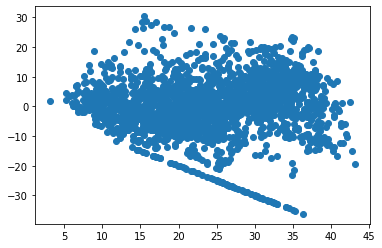

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **DECISION TREE**


In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8490849826083428
MSE : 23.239505969075484
RMSE : 4.820737077364361
MAE : 3.357109402748341
R2 : 0.8490849826083428
Adjusted R2 : 0.8479737813758225


**Looks like our r2 score value is 0.84 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 28.007310309929668
RMSE : 5.292193336408796
MAE : 3.642783049977045
R2 : 0.8227008419710993
Adjusted R2 : 0.8213953718705643


**The r2_score for the test set is 0.82. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

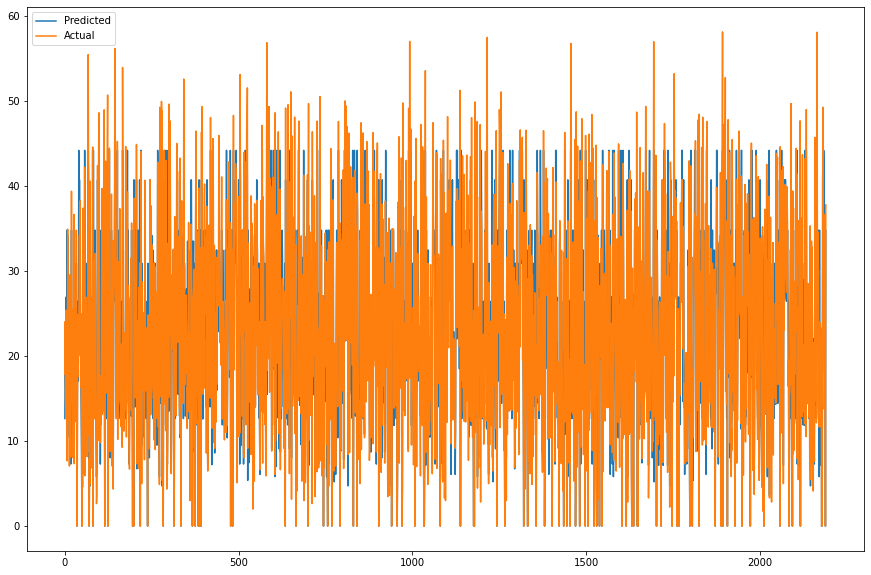

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

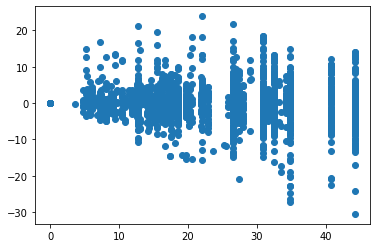

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

### **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9894386626027623
MSE : 1.6263475148238875
RMSE : 1.2752833076708436
MAE : 0.8116537150351005
R2 : 0.9894386626027623
Adjusted R2 : 0.9892018834364533


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.789273599874731
RMSE : 3.576209389825312
MAE : 2.218820171258399
R2 : 0.9190380148623156
Adjusted R2 : 0.9172228932898687


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

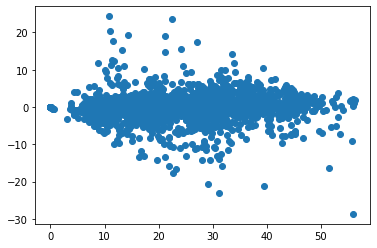

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([3.05714726e-01, 1.53499224e-01, 1.10775035e-02, 1.10734380e-02,
       1.88067219e-02, 2.97830736e-02, 3.08389502e-02, 1.47288158e-03,
       4.85044920e-03, 1.31500028e-02, 2.09111464e-02, 3.03742071e-02,
       2.64275944e-02, 8.14198285e-03, 3.67527344e-03, 1.47742515e-02,
       9.86835008e-04, 2.01588351e-03, 8.96527389e-04, 2.66793536e-04,
       2.45624167e-04, 3.89807554e-04, 1.54333146e-03, 3.49691118e-03,
       1.04049795e-02, 3.09333973e-02, 1.74532346e-02, 1.14894588e-02,
       1.24668441e-02, 1.02048238e-02, 3.40361781e-03, 3.71232132e-03,
       8.25610869e-04, 1.03767907e-02, 3.75839174e-03, 1.51888661e-01,
       2.66522408e-04, 4.22451312e-03, 1.26520378e-03, 1.47223273e-03,
       1.95754251e-03, 5.59397531e-04, 1.35594597e-03, 7.64932086e-04,
       2.67336365e-03, 4.78906865e-03, 7.22714875e-04, 1.86172902e-02])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
35,Functioning_Day_Yes,0.15
1,Humidity,0.15
25,Hour_18,0.03
5,Solar_Radiation,0.03
6,Rainfall,0.03
12,Hour_5,0.03
11,Hour_4,0.03
10,Hour_3,0.02
26,Hour_19,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

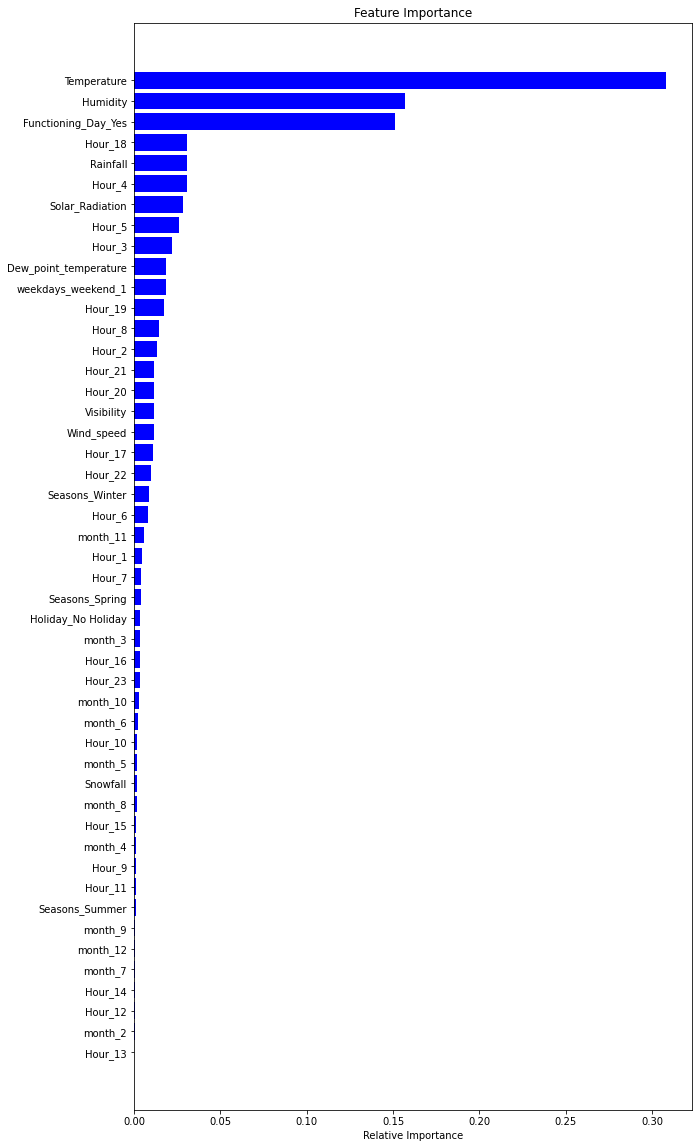

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

### **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8792545917263987
MSE : 18.593667381891272
RMSE : 4.312037497737151
MAE : 3.2544569925447444
R2 : 0.8792545917263987
Adjusted R2 : 0.8765475484769205


**Looks like our r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.311484890859177
RMSE : 4.61643638436177
MAE : 3.476623589495353
R2 : 0.8650884970501667
Adjusted R2 : 0.8620638580302732


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

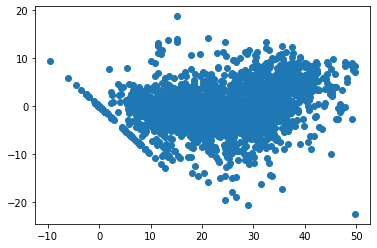

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

array([3.15780695e-01, 1.26230762e-01, 3.58908249e-04, 5.87975710e-04,
       8.39744299e-03, 4.80909638e-02, 6.50566755e-02, 2.12847990e-04,
       4.09901407e-04, 6.06602095e-03, 1.48251635e-02, 2.75967859e-02,
       2.07865013e-02, 5.61488942e-03, 0.00000000e+00, 1.04039477e-02,
       0.00000000e+00, 2.80796024e-03, 1.37948516e-03, 0.00000000e+00,
       0.00000000e+00, 4.51652026e-05, 0.00000000e+00, 3.61654579e-04,
       7.29825592e-03, 3.02335512e-02, 1.78281454e-02, 1.12242613e-02,
       1.56825848e-02, 1.19639035e-02, 3.33070922e-04, 5.20595611e-05,
       0.00000000e+00, 3.62799014e-02, 1.91895608e-03, 1.75534689e-01,
       0.00000000e+00, 1.77094565e-03, 1.33684008e-04, 2.04838602e-04,
       2.89016742e-03, 0.00000000e+00, 2.27935503e-03, 0.00000000e+00,
       6.54285183e-03, 4.49082445e-03, 5.53067183e-04, 1.77711403e-02])

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.13
2,Wind_speed,0.00
3,Visibility,0.00
4,Dew_point_temperature,0.01


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
35,Functioning_Day_Yes,0.18
1,Humidity,0.13
6,Rainfall,0.07
5,Solar_Radiation,0.05
33,Seasons_Winter,0.04
11,Hour_4,0.03
25,Hour_18,0.03
28,Hour_21,0.02
26,Hour_19,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

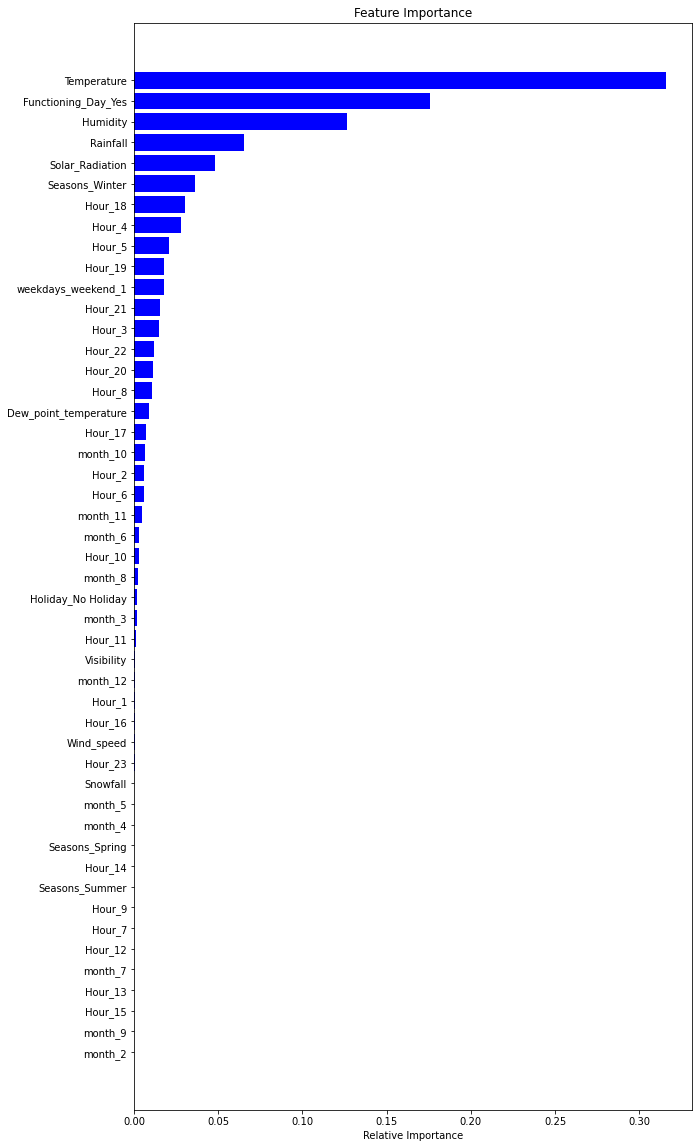

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Conclusion**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented some machine learning algorithms Linear Regression,lasso,ridge,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0             Linear regression   4.444  34.810  5.900     0.774   
             1              Lasso regression   7.242  91.458  9.563     0.406   
             2      Dicision tree regression   4.993  47.587  6.898     0.691   
             3      Random forest regression   0.807   1.619  1.272     0.989   
             4  Gradient boosting regression   3.254  18.594  4.312     0.879   
Test set     0             Linear regression   4.373  33.085  5.752     0.791   
             1              Lasso regression   7.442  96.685  9.833     0.388   
             2      Dicision tree regression   5.432  58.413  7.643     0.630   
             3      Random forest regression   2.237  12.878  3.589     0.918   
             4  Gradient boosting regression   3.477  21.311  4.616     0.865   

                Adjusted R2  
Training set 0         0.77  
             1         0.39  
             2         0.68  
             3         0.99  
             4         0.88  
Test set     0         0.79  
             1         0.37  
             2         0.62  
             3         0.92  
             4         0.86


• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.


However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***